<a href="https://colab.research.google.com/github/sandipanpaul21/KNN-Naive-Bayes-in-Python/blob/main/04_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K Nearest Neighbour**

- KNN is a supervised alogrithim
- KNN used for both 
  - Classification : Return Mode of K Labels
  - Regression : Return Mean of K Labels
- For a given data point in the set, the algorithms find the distances between this and all other K numbers of datapoint in the dataset close to the initial point and votes for that category that has the most frequency. 
- Usually, *Euclidean distance* is taking as a measure of distance. Thus the end resultant model is just the labeled data placed in a space. 

**So now how do we choose K?**
- Generally we use the Square root of the number of samples in the dataset as value for K. 
- An optimal value has to be found out since lower value may lead to overfitting and higher value may require high computational complication in distance. So using an error plot may help. 
- Another method is the elbow method. You can prefer to take root else can also follow the elbow method.

**Steps in KNN**
1. Select the value of K neighbors(say k=5)
2. Find the K (5) nearest data point for our new data point based on euclidean distance
3. Among these K data points count the data points in each category
4. Assign the new data point to the category that has the most neighbors of the new datapoint

**KNN is a Lazy Algorithim**
- KNN is a Lazy learner because it doesn't learn a discriminative function from training set but memorize the trainig dataset instead. In other word, during Training Time all it is doing is to store all the data it gets.
- For example, in logistic regression alogrithim learns its model weight (parameters) during training time. In contrast, **there is no training time in KNN**. Although it become expensive later. 
- Expensive in terms of, each time a new datapoint comes in and we want to make prediction, KNN will search for the Nearest Neighbour in the entire set. Hence prediction step becomes more time-consuming and computationally expensive.

**Data Preporcessing in KNN**
- As, it is a distance based algorithim, all columns should be in same scale





**The Abalone Problem Statement**
- The age of an abalone can be found by cutting its shell and counting the number of rings on the shell.
- In the Abalone Dataset, you can find the age measurements of a large number of abalones along with a lot of other physical measurements.
- The *goal of the project is to develop a model that can predict the age of an abalone based purely on the other physical measurements.* This would allow researchers to estimate the abalone’s age without having to cut its shell and count the rings.

We’ll be applying a kNN to find the closest prediction score possible.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns

url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)
abalone.columns = ["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]

# For now wer are removinf Sex for analysis purpose
abalone = abalone.drop("Sex", axis=1)
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


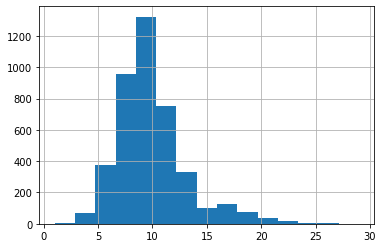

In [ ]:
# Descriptive Statistics
# The target variable of this exercise is Rings

abalone["Rings"].hist(bins=15)
plt.show()

In [ ]:
# Correlation 
# A strong correlation between an independent variable and your goal variable would be a good sign, 
# You can observe the complete correlation matrix in correlation_matrix. 
# The most important correlations are the ones with the target variable Rings. 

correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

# Inference : 
# Now look at the correlation coefficients for Rings with the other variables. 
# The closer they are to 1, the more correlation there is.
# Very high correlations mean that you can expect a straightforward modeling process. 
# In this case, you’ll have to try and see what results you can obtain using the kNN algorithm.

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [ ]:
# Separate the data into training and test data. 
X = abalone.drop("Rings", axis=1)
y = abalone["Rings"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=12345)
# The test_size refers to the number of observations 
# that you want to put in the training data and the test data. 
# If you specify a test_size of 0.2, your test_size will be 20 percent of the original data, 
# therefore leaving the other 80 percent as training data.

# The random_state is a parameter that allows you to obtain the same results every time 
# the code is run. 
# train_test_split() makes a random split in the data, 
# which is problematic for reproducing the results. 
# Therefore, it’s common to use random_state. 
# The choice of value in random_state is arbitrary.

# Model Parameter
knn_model = KNeighborsRegressor(n_neighbors=3)

# Model Fit
knn_model.fit(X_train, y_train)

# Model Prediction
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
print("RMSE of K = 3 :",rmse)

RMSE of K = 3 : 2.375417924000521


**Tune and Optimize kNN**

**Using GridSearchCV**

- Until now, you’ve always worked with k=3 in the kNN algorithm, but the best value for k is something that you need to find empirically for each dataset.

- When you use few neighbors, you have a prediction that will be much more variable than when you use more neighbors:
    - If you *use one neighbor only*
      - The prediction can strongly change from one point to the other. 
      - When you think about your own neighbors, one may be quite different from the others. 
      - If you lived next to an outlier, your 1-NN prediction would be wrong.
      - **Underfit or Outlier**

    - If you *have multiple data points*, the impact of one extremely different neighbor will be much less.

    - If you use *too many neighbors*
      - The prediction of each point risks being very close. 
      - Let’s say that you use all neighbors for a prediction. In that case, every prediction would be the same.
      - **Overfit**

- To find the best value for k, you’re going to use a tool called GridSearchCV, used for tuning hyperparameters of machine learning models. In your case, it will help by automatically finding the best value of k for your dataset.

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [ ]:
# Here, you use GridSearchCV to fit the model. 
# In short, GridSearchCV repeatedly fits kNN regressors on a part of the data 
# tests the performances on the remaining part of the data. 
# Doing this repeatedly will yield a reliable estimate of the predictive performance 
# of each of the values for k. In this example, you test the values from 1 to 50.
# In the end, it will retain the best performing value of k, which you can access with .best_params_:

gridsearch.best_params_

# Inference : 
# In this code, you print the parameters that have the lowest error score. 
# With .best_params_, you can see that choosing 25 as value for k 
# It will yield the best predictive performance. 

{'n_neighbors': 25}

In [ ]:
# Now that you know what the best value of k is, 
# you can see how it affects your train and test performances:

test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)

print("RMSE for k = 25 :",test_rmse)

RMSE for k = 25 : 2.1700197339962175


**Choosing a K Value**

- Let’s go ahead and use the elbow method to pick a good K Value. 
- We will basically check the error rate for k = 1 to say k = 40. 
- For every value of k we will call KNN classifier and then choose the value of k which has the least error rate.

Text(0, 0.5, 'RMSE Error Rate')

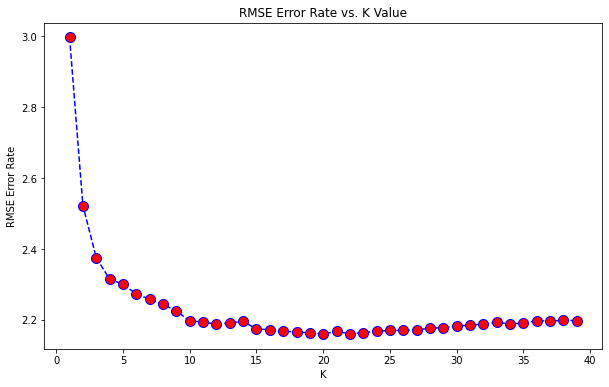

In [ ]:
# Choose the K value which have least RMSE Value

import numpy as np
error_rate = []
# Might take some time
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(sqrt(mean_squared_error(y_test,y_pred)))

# Plot for Error Rate vs K Value
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('RMSE Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('RMSE Error Rate')